In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [50]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [51]:
df = df[['Day_Name', 'week_cos', 'week_sin', 'first']]

labelencoder = LabelEncoder()
df['Day_Name'] = labelencoder.fit_transform(df['Day_Name'])

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Day_Name']]).toarray())
ohe_df.columns = ohe.get_feature_names()
ohe_df = ohe_df.astype(int)

df = df.join(ohe_df)

output = len(df['first'].unique())

In [52]:
df.head()

,Day_Name,week_cos,week_sin,first,x0_0,x0_1,x0_2,x0_3
0,0,-0.222521,-0.974928,4,1,0,0,0
1,1,-0.222521,-0.974928,4,0,1,0,0
2,2,-0.222521,-0.974928,12,0,0,1,0
3,0,-0.900969,-0.433884,2,1,0,0,0
4,1,-0.900969,-0.433884,1,0,1,0,0


In [53]:
X = df.drop(['first', 'Day_Name'], axis = 1)
y = df['first']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [ ]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(125, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))

optimizer = Adadelta(learning_rate=0.001, rho = 0.95, epsilon = 1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 5000, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/5000
58/58 [==============================] - 1s 8ms/step - loss: 3.2531 - accuracy: 0.0686 - val_loss: 3.2459 - val_accuracy: 0.0859
Epoch 2/5000
31/58 [===============>..............] - ETA: 0s - loss: 3.2683 - accuracy: 0.0451

In [16]:
val_loss[len(val_loss)-1]

2.738187551498413

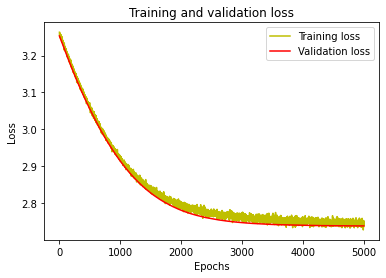

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
#plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

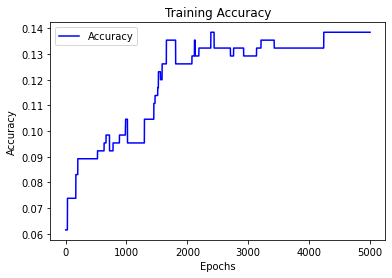

In [11]:
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
input_date = datetime.strptime('03/27/2021', '%m/%d/%Y')
input_week = int(input_date.strftime("%W"))  
input_week_cos = np.cos(2 * np.pi * input_week / 7)
input_week_sin = np.sin(2 * np.pi * input_week / 7)

input_data = []
input_data.append(input_week_cos)
input_data.append(input_week_sin)
input_data.append('Saturday')

unseen = pd.DataFrame([input_data], columns = ['week_cos', 'week_sin', 'Day_Name'])

In [26]:
day_str = unseen['Day_Name']
day_str

0    Saturday
Name: Day_Name, dtype: object

In [47]:
input_df = pd.DataFrame(ohe.transform(labelencoder.transform(day_str.ravel()).reshape(-1,1)).toarray().astype(int))
unseen = unseen.join(input_df)

ValueError: columns overlap but no suffix specified: Index([0, 1, 2, 3], dtype='object')

In [48]:
unseen = unseen.drop('Day_Name', axis = 1)

In [49]:
unseen

,week_cos,week_sin,0,1,2,3
0,-0.222521,-0.974928,1,0,0,0
